In [165]:
import numpy as np
import matplotlib . pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed (0)
centers = [[ -5 , 0] , [0 , 1.5]]
X , y = make_blobs ( n_samples =1000 , centers = centers ,random_state =40)
transformation = [[0.4 , 0.2] , [ -0.4 , 1.2]]
X = np.dot(X , transformation )

# Add a bias term to the feature matrix
X = np.c_[np.ones((X.shape [0] , 1)), X]

# Initialize coefficients
W = np.zeros(X.shape [1])

# Define the logistic sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the logistic loss ( binary cross - entropy ) function
def log_loss(y_true, y_pred):
    epsilon = np.exp(-15)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon) # Clip to avoid log (0)
    return -( y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
# Gradient descent and Newton method parameters
learning_rate = 0.1
iterations = 10
loss_history = []

Text(0.5, 1.0, 'Data scatter plot')

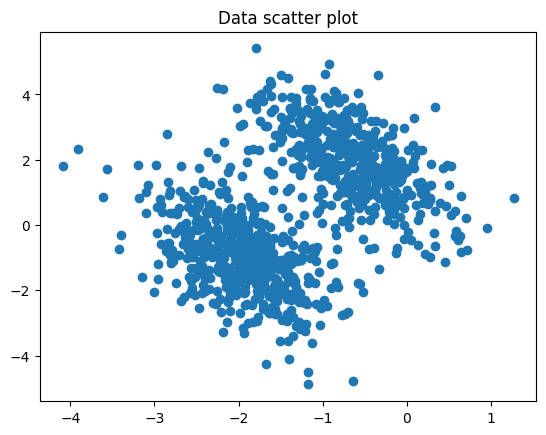

In [171]:
plt.scatter(X[:,1], X[:,2])
plt.title("Data scatter plot")

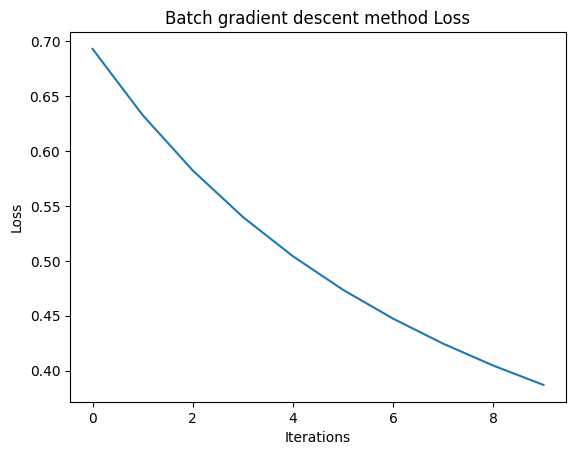

In [172]:
# Performing gradient descent based weight update
N = len(y)

for i in range(iterations):
    # Predict the target values using the sigmoid function
    y_pred = sigmoid(np.dot(X,W))
    # Calculate the gradient of the loss function
    grad = (np.dot(np.ones(N).T, np.dot(np.diag(y_pred - y),X)) / N)
    # Update the weights
    W -= learning_rate*grad
    # Calculate the loss and append to the loss_history
    loss = np.sum(log_loss(y, y_pred))/N
    loss_history.append(loss)

# Plot the loss curve
plt.plot(range(iterations),loss_history)
plt.title("Batch gradient descent method Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

In [183]:
loss_history

[0.6931471805599454,
 0.6328211522065751,
 0.5823972949578101,
 0.5400400231011129,
 0.5042051102371915,
 0.4736389534183553,
 0.44734329598374695,
 0.4245298511469433,
 0.4045770169455826,
 0.38699321002389653]

### Newton's Method

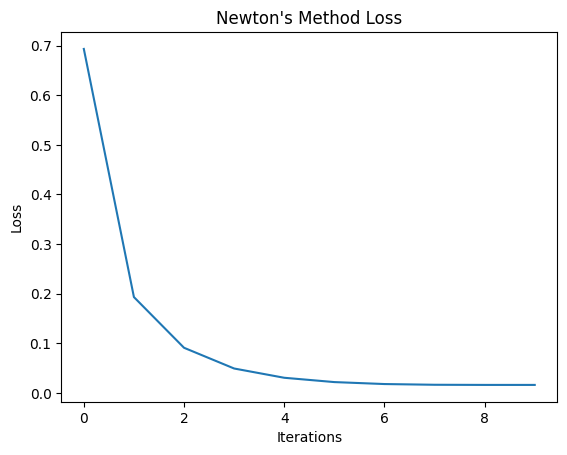

In [173]:
# Performing Newton's method based weight update
from numpy.linalg import inv

# Initialize weights as zeros
W = np.zeros(X.shape[1])
loss_history_newton = []

for i in range(iterations):
    # Predict the target values using the sigmoid function
    y_pred = sigmoid(np.dot(X, W))
    # Calculate si values
    s = (y_pred - y) * (1 - y_pred - y)
    # Calculating S
    S = np.diag(s)
    # Calculating the gradient
    grad_1 = inv(np.dot(np.dot(X.T, S), X) / len(y))
    grad_2 = np.dot(np.dot(np.ones(len(y)).T, np.diag(y_pred - y)), X) / len(y)
    grad_newton = np.dot(grad_1, grad_2)
    # Updating weights
    W -= grad_newton
    # Calculating loss
    loss = np.sum(log_loss(y, y_pred))/N
    loss_history_newton.append(loss)

# Plotting the loss curve
plt.plot(range(iterations), loss_history_newton)
plt.title("Newton's Method Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

In [184]:
loss_history_newton

[0.6931471805599454,
 0.1932642413241019,
 0.09113723316903417,
 0.049380588107335685,
 0.030716074598479748,
 0.02202255077751398,
 0.01807357271206807,
 0.016618079685160887,
 0.016323538927018454,
 0.016307289353307733]

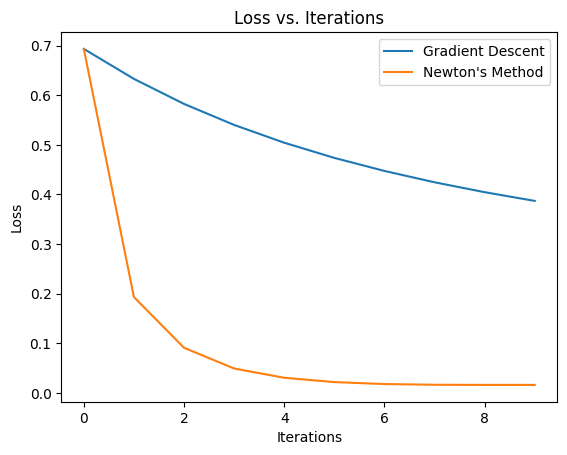

In [174]:
plt.plot(range(iterations), loss_history, label='Gradient Descent')
plt.plot(range(iterations), loss_history_newton, label="Newton's Method")
plt.title("Loss vs. Iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()


# Question 2

In [175]:
import numpy as np
import matplotlib . pyplot as plt
from sklearn . datasets import fetch_openml
from sklearn . linear_model import LogisticRegression
from sklearn . model_selection import GridSearchCV , train_test_split
from sklearn . pipeline import Pipeline
from sklearn . preprocessing import StandardScaler
from sklearn . metrics import accuracy_score
from sklearn . utils import check_random_state
from sklearn.decomposition import PCA
# data loading
train_samples = 500
X, y = fetch_openml ("mnist_784", version =1, return_X_y =True , as_frame = False )
random_state = check_random_state (0)
permutation = random_state.permutation (X.shape [0])
X = X[ permutation ]
y = y[ permutation ]
X = X. reshape ((X. shape [0] , -1))
X_train , X_test , y_train , y_test = train_test_split (X, y, train_size = train_samples , test_size =100)

c:\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [176]:
# Create a lasso LogisticRegression classifier
logistic = LogisticRegression(penalty='l1', solver='liblinear', multi_class='auto')

# Define a Standard Scaler to normalize inputs
scaler = StandardScaler()
# Create a pipeline to chain preprocessing steps and the logistic classifier
pipe = Pipeline(steps=[("scaler", scaler), ("logistic", logistic)])
# Define a parameter grid for hyperparameter tuning
param_grid = {
    "logistic__C": np.logspace(-2, 2, 9),
}


In [177]:
# Perform grid search for hyperparameter tuning
search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', verbose=1)
search.fit(X_train, y_train)
# Get the best model
best_model = search.best_estimator_
# Predict using the best model
y_pred = best_model.predict(X_test)
# Calculated accuracy for the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set: ", accuracy)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_['logistic__C'])

Fitting 5 folds for each of 9 candidates, totalling 45 fits


Accuracy on the test set:  0.85
Best parameter (CV score=0.824):
0.31622776601683794


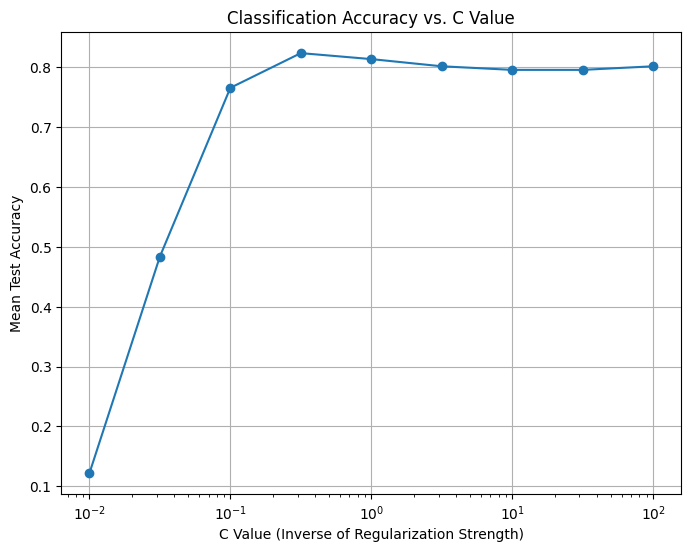

In [178]:
import matplotlib.pyplot as plt

# Get the cross-validation results
results = search.cv_results_

# Extract mean test scores and C values
mean_test_scores = results['mean_test_score']
C_values = param_grid['logistic__C']

# Plot the results
plt.figure(figsize=(8, 6))
plt.semilogx(C_values, mean_test_scores, marker='o')
plt.title('Classification Accuracy vs. C Value')
plt.xlabel('C Value (Inverse of Regularization Strength)')
plt.ylabel('Mean Test Accuracy')
plt.grid(True)
plt.show()


In [186]:
print(C_values)
print(mean_test_scores)

[1.00000000e-02 3.16227766e-02 1.00000000e-01 3.16227766e-01
 1.00000000e+00 3.16227766e+00 1.00000000e+01 3.16227766e+01
 1.00000000e+02]
[0.122 0.484 0.766 0.824 0.814 0.802 0.796 0.796 0.802]


In [180]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Predict on the test set using the best C value
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Confusion Matrix:\n{confusion}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Confusion Matrix:
[[ 6  0  0  0  0  1  0  0  1  0]
 [ 0 13  0  0  0  0  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0  0]
 [ 0  0  0  8  0  0  0  0  0  0]
 [ 0  1  0  0  8  0  0  0  0  2]
 [ 0  0  0  0  1  3  0  0  0  0]
 [ 0  0  0  0  1  0  8  0  0  0]
 [ 0  0  0  0  1  0  0 11  0  2]
 [ 0  0  0  0  1  0  0  0 11  0]
 [ 0  1  0  1  0  1  0  1  0 11]]
Precision: 0.8589
Recall: 0.8552
F1-score: 0.8527


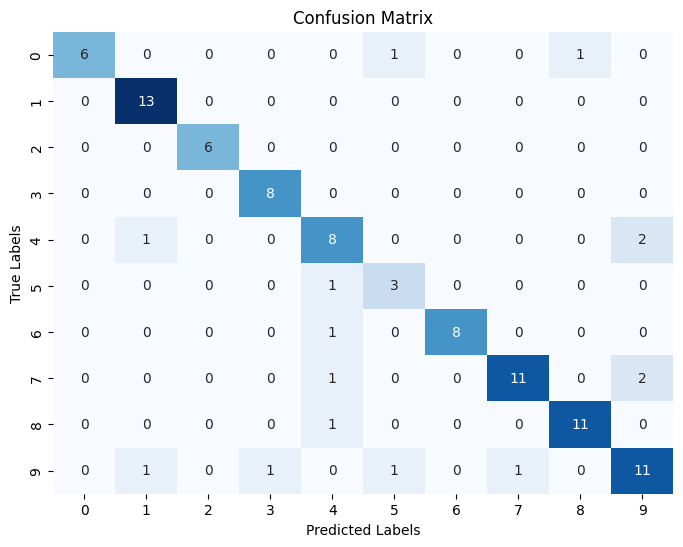

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
